In [2]:
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

In [4]:
%env LD_LIBRARY_PATH /usr/local/cuda-10.0/lib64/

env: LD_LIBRARY_PATH=/usr/local/cuda-10.0/lib64/


In [5]:
import os

base_dir = '/home/benoitpatra/code/deeplxp/data/dogsVScats'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

os.environ["CUDA_VISIBLE_DEVICES"]="0"

print(os.environ["LD_LIBRARY_PATH"])

from keras import backend as K
import tensorflow as tf
import keras as ks
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

if tf.test.gpu_device_name():
 print("Default GPU Device: {}".format(tf.test.gpu_device_name()))
else:
 print("Please install GPU version of TF")

/usr/local/cuda-10.0/lib64/
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 4709:00:00.0, compute capability: 3.7

Default GPU Device: /device:GPU:0


In [62]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13098088579059882046
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3437572397643178704
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15726944281437297503
physical_device_desc: "device: XLA_GPU device"
]


In [65]:
import tensorflow as tf
with tf.device('/device:XLA_CPU:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)
with tf.Session() as sess:
    print (sess.run(c))

InvalidArgumentError: Cannot assign a device for operation MatMul_1: node MatMul_1 (defined at /home/benoitpatra/code/deeplxp/venv/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:1748)  was explicitly assigned to /device:XLA_GdsqfdsqPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:XLA_CPU:0, /job:localhost/replica:0/task:0/device:XLA_GPU:0 ]. Make sure the device specification refers to a valid device.
	 [[MatMul_1]]

In [6]:
import matplotlib.pyplot as plt

def plot_history2(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc = history_dict['acc']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
    plt.title('Taining and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    plt.plot(epochs, acc_values, 'bo', label='Training acc.')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc.')
    plt.title('Taining and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [43]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen =  ImageDataGenerator(rescale=1./255, rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size = 20, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size = 20, 
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
from keras import optimizers


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=60, validation_data=validation_generator, validation_steps=50)
plot_history2(model.history)

Epoch 1/60
100/100 [==============================] - 28s 282ms/step - loss: 0.6951 - acc: 0.4955 - val_loss: 0.6863 - val_acc: 0.5000
Epoch 2/60
 99/100 [============================>.] - ETA: 0s - loss: 0.6866 - acc: 0.5429

KeyboardInterrupt: 

In [14]:
from keras.preprocessing import image

test_datagen_itr = test_datagen.flow_from_directory(test_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size = 10, 
                                                    class_mode='binary')
 
for batch, label in test_datagen_itr:
    batch1 = batch
    label1 = label
    break



Found 1000 images belonging to 2 classes.


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [15]:
rest = model.evaluate_generator(test_datagen_itr, steps=100)
print(rest)

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [16]:
index = 13
results = model.predict(batch1)
plt.imshow(image.array_to_img(batch1[index]))
print(results[index][0])
if results[index] < 0.5:
    print("This is a Cat!")
else:
    print("This is a Dog!")
 
print(label[index])

if label1[index] == 0:
    print("and is Cat")
else:
    print("and is Dog")


NameError: name 'batch1' is not defined

In [17]:
from keras.models import load_model
model = load_model('./data/cats_and_dogs_v2.h5')
model.summary()

OSError: Unable to open file (unable to open file: name = './data/cats_and_dogs_v2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [46]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

Tensor("conv2d_1_input_3:0", shape=(?, 150, 150, 3), dtype=float32)


<class 'PIL.Image.Image'>
(150, 150, 3)
(1, 150, 150, 3)


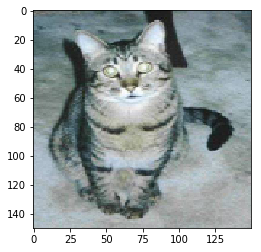

In [44]:
tgt_path = '/home/benoitpatra/code/data/test/cats/cat.1705.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(tgt_path, target_size=(150, 150))
print(type(img))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)
img_tensor /= 255.0

import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [51]:
activations = activation_model.predict(img_tensor)
print(activations[0].shape)

(1, 148, 148, 32)


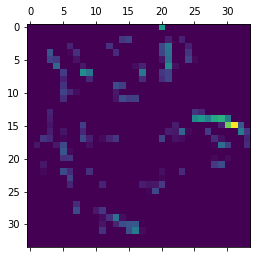

In [61]:
plt.matshow(activations[4][0, :, :, 3], cmap='viridis')

/home/benoitpatra/code/venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


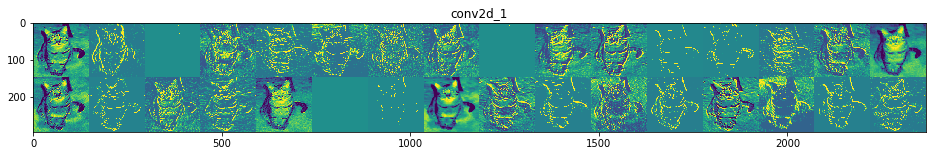

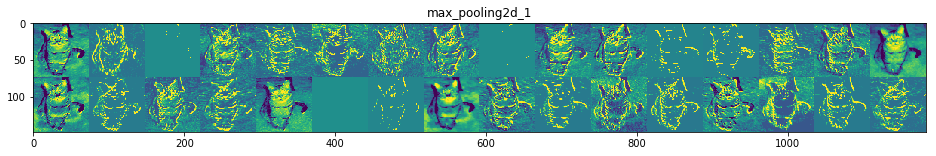

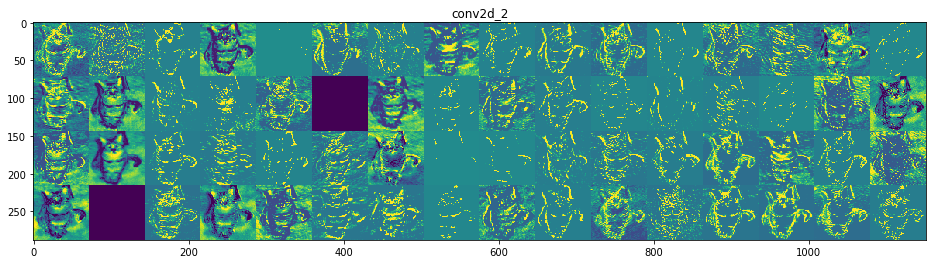

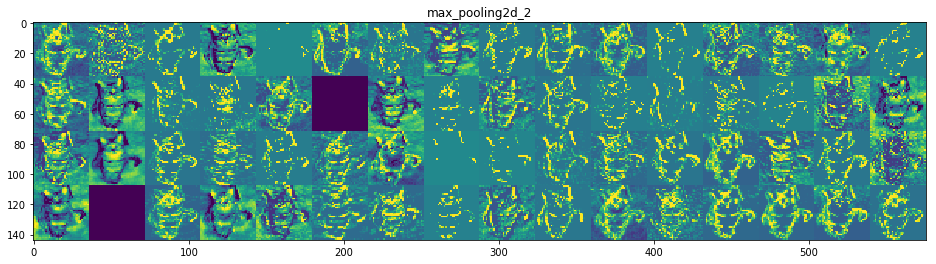

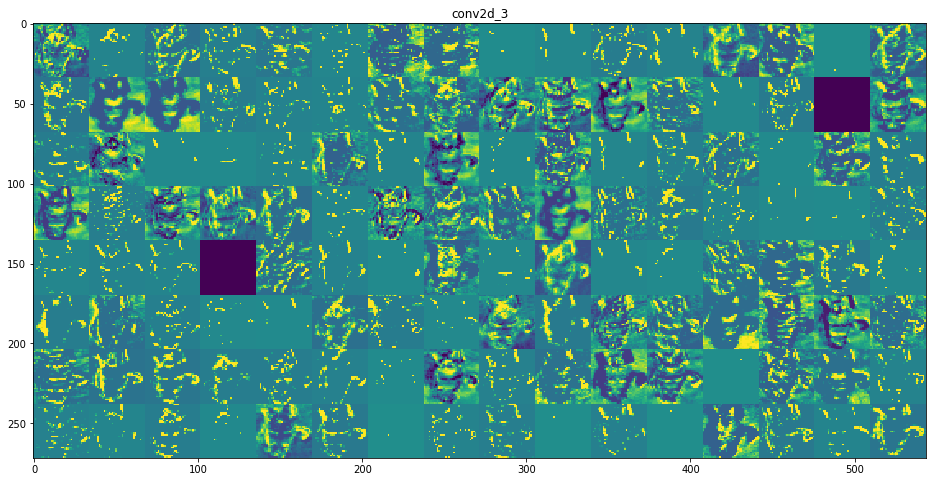

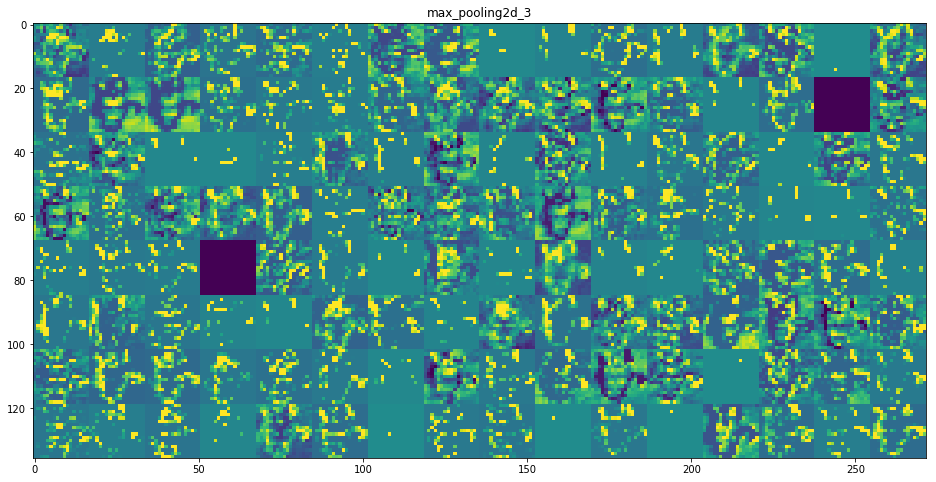

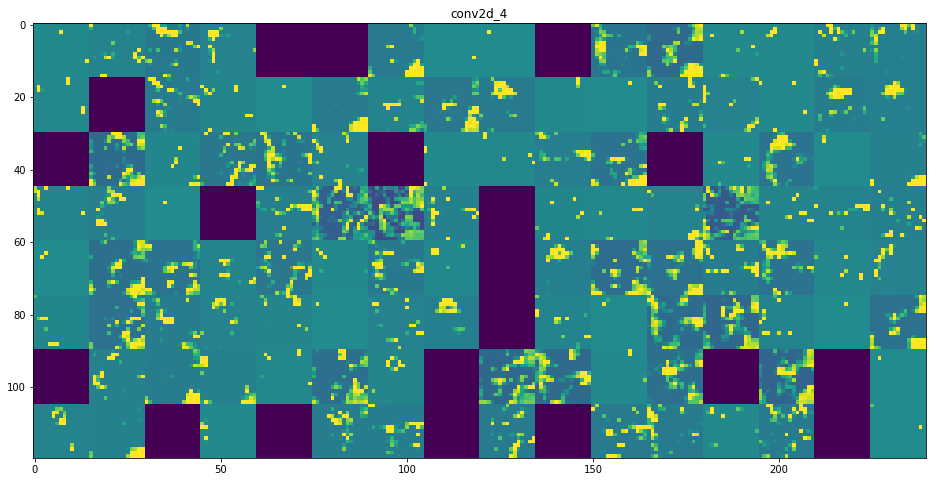

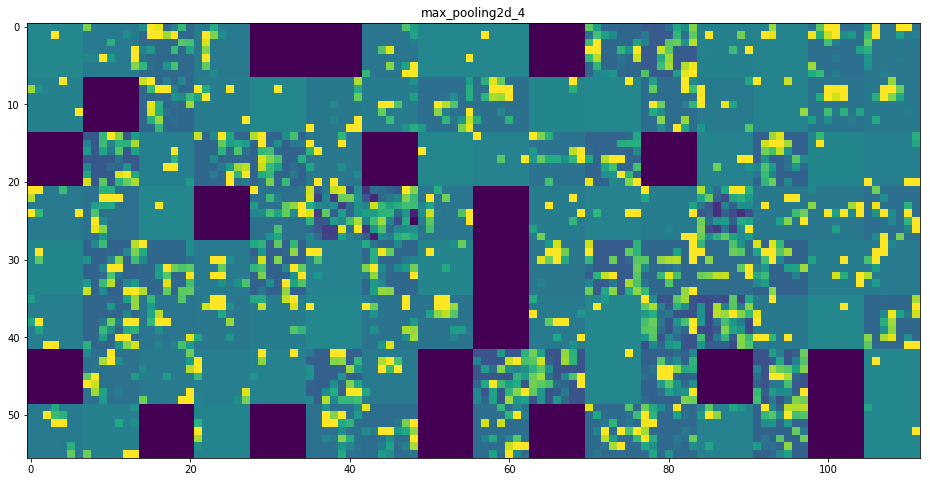

In [64]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale*display_grid.shape[1],
                       scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [78]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    #x *= 255
    #x = np.clip(x, 0, 255).astype('uint8')
    return x
    

def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [82]:
def print_filters(layer_name):
    size = 64
    margin = 5

    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):
        for j in range(8):
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    plt.figure(figsize=(20, 20))
    plt.imshow(results)

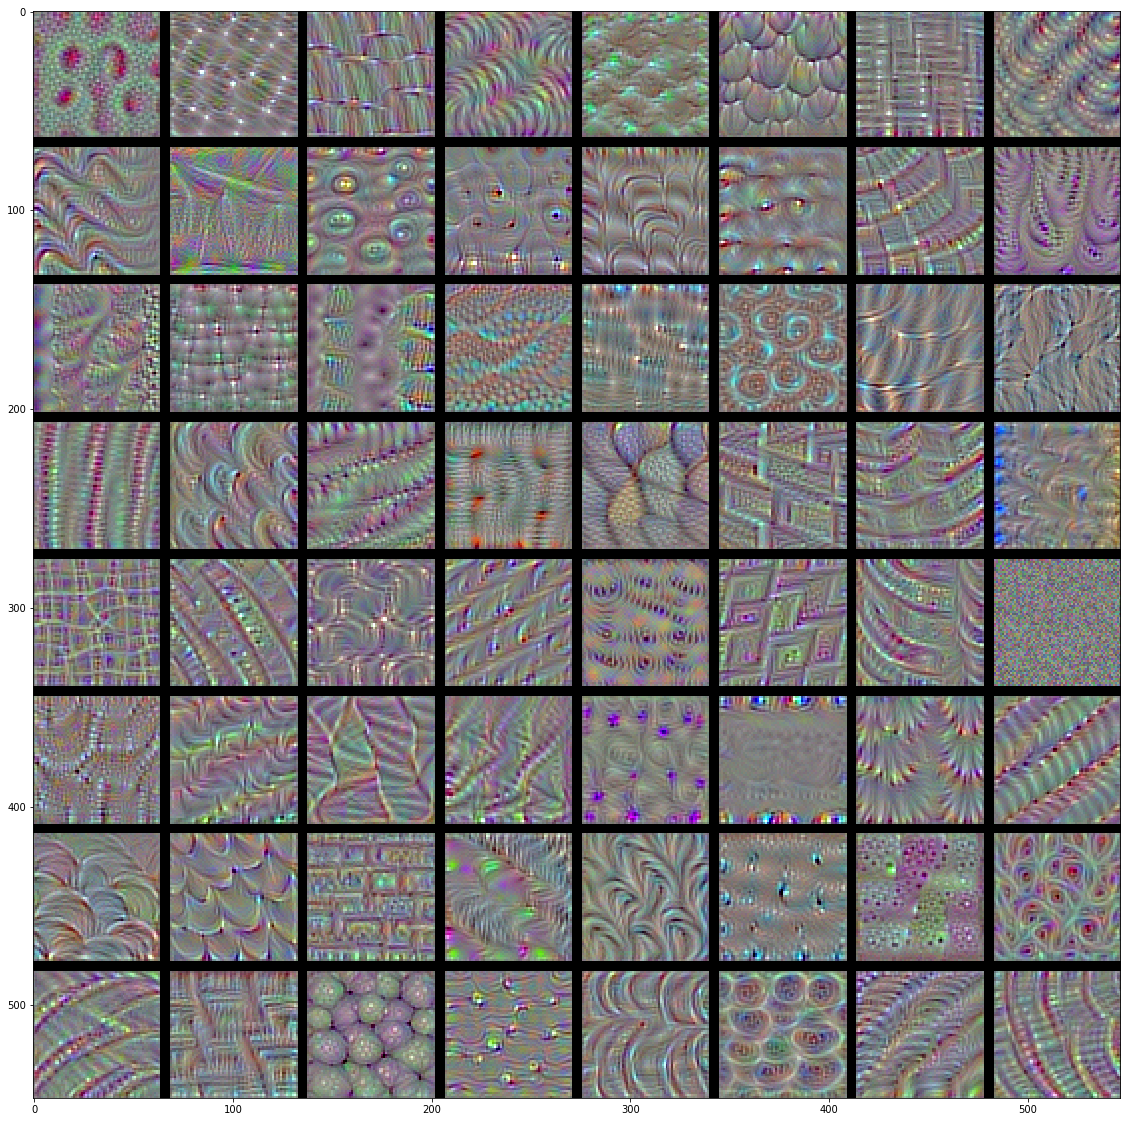

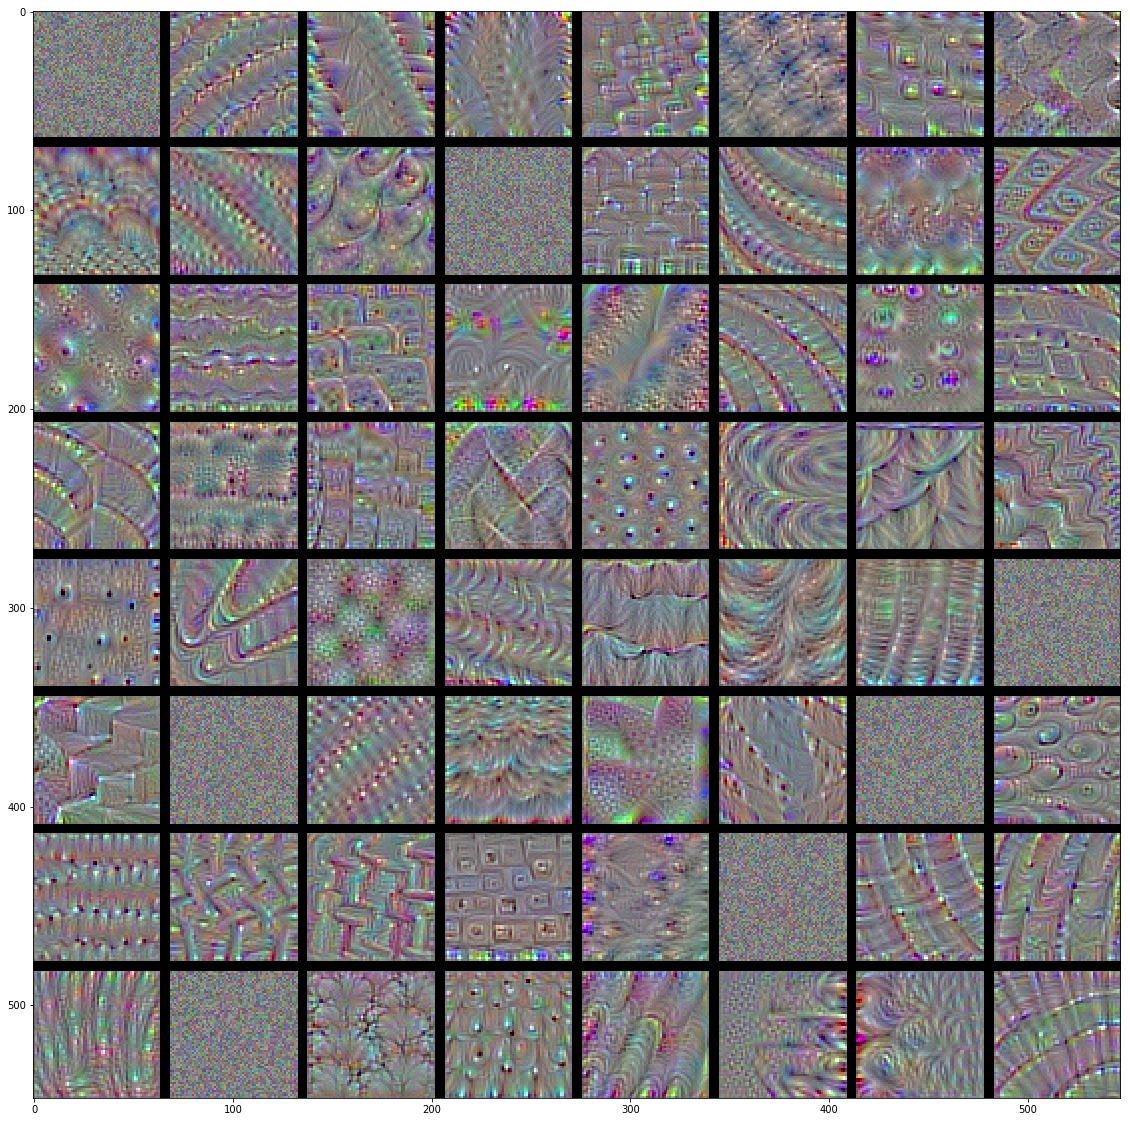

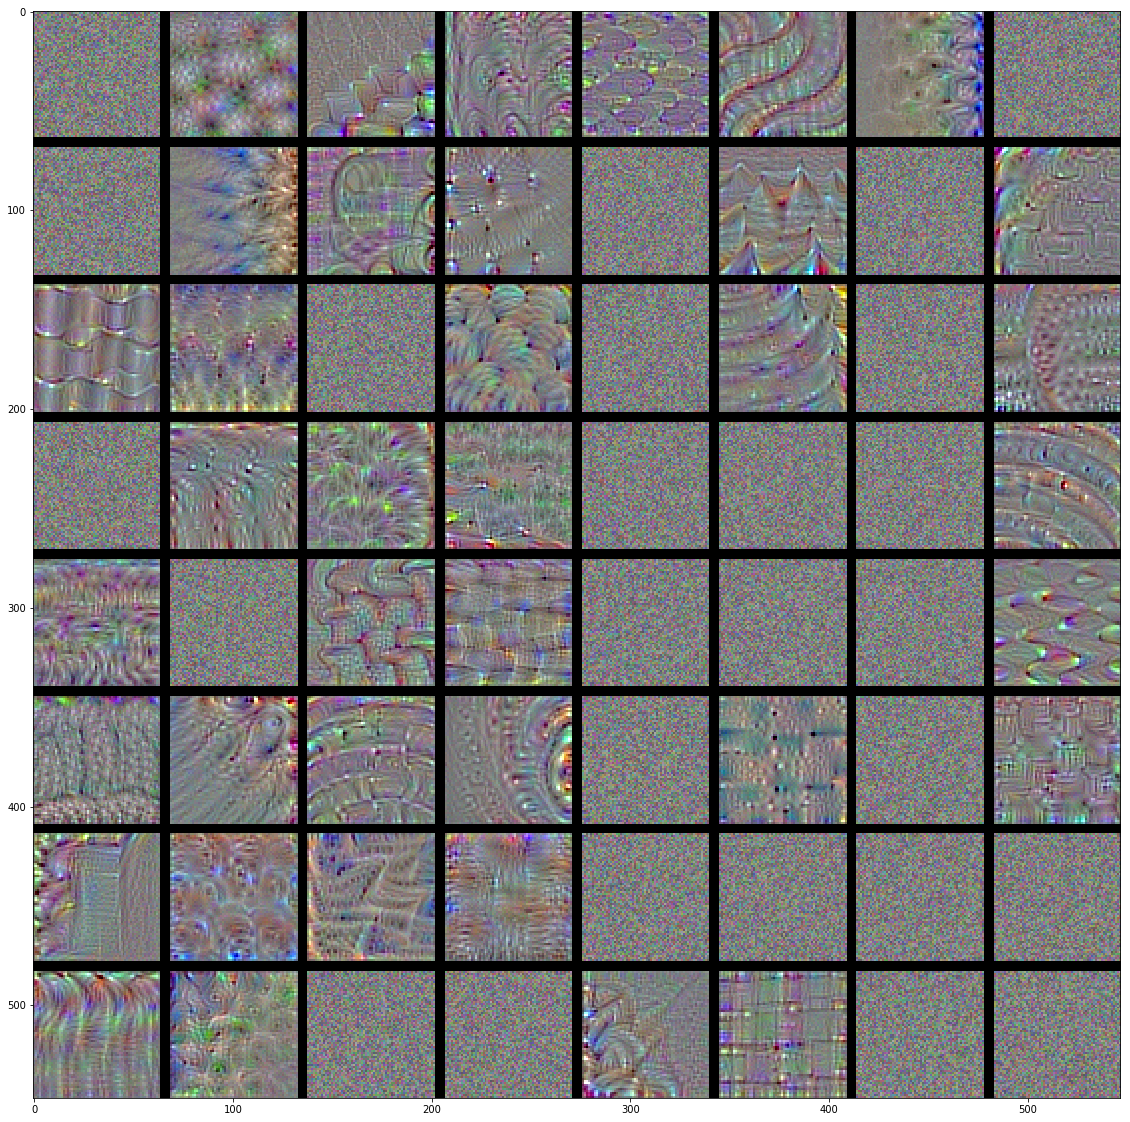

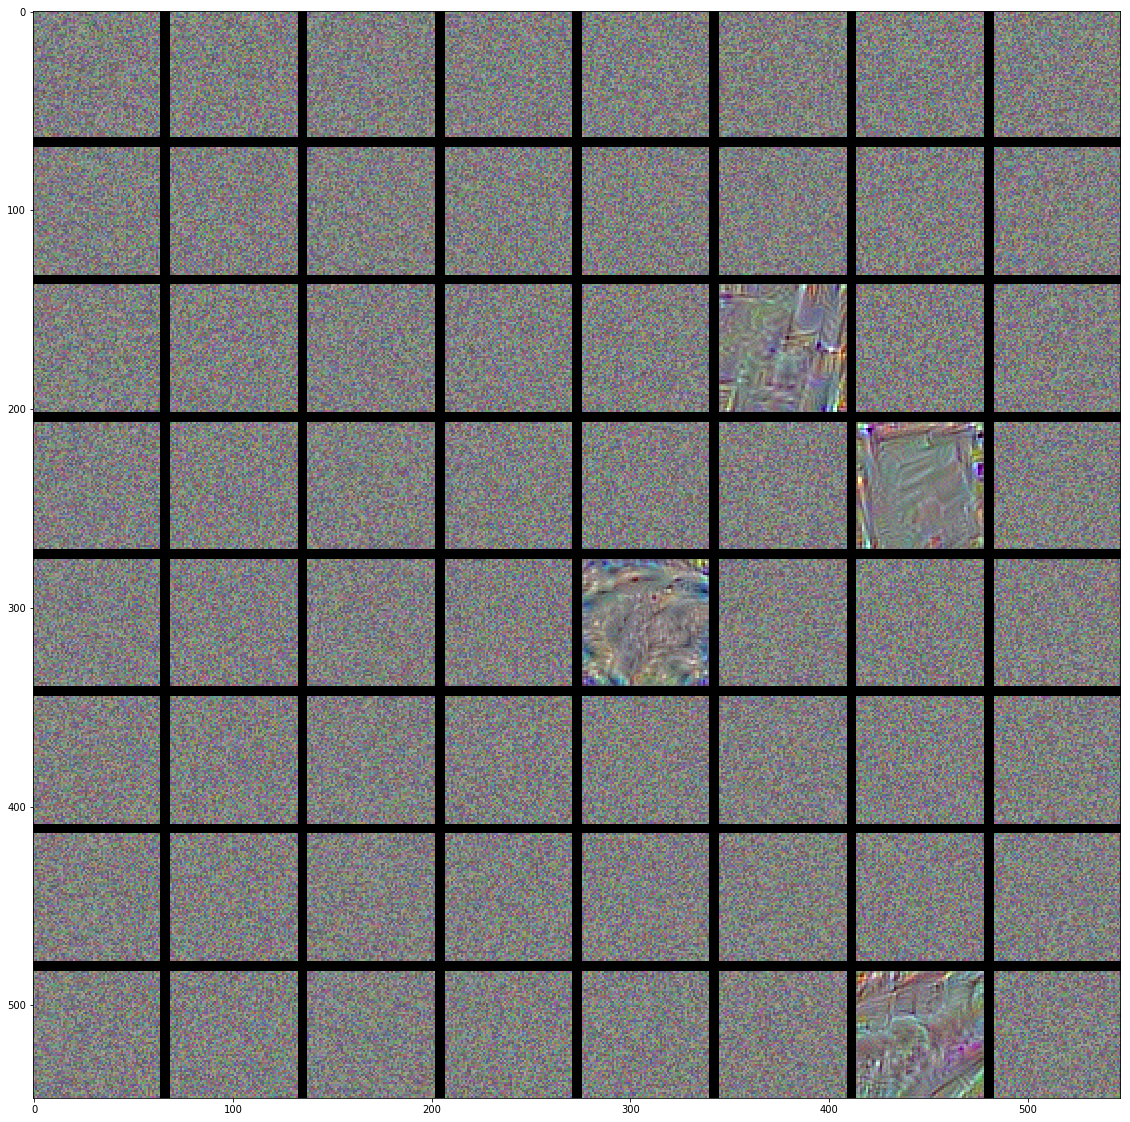

In [83]:
print_filters('block4_conv1')
print_filters('block4_conv2')
print_filters('block4_conv3')
print_filters('block5_conv3')